## Limiting one hot encoding to top 10 unique variables

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\pavan\OneDrive\Desktop\prep\datasets\test\test.csv', usecols = ['X1','X2','X3','X4','X5','X6'])

In [3]:
data.head()

,X1,X2,X3,X4,X5,X6
0,v,n,f,d,t,a
1,b,ai,a,d,b,g
2,v,as,f,d,a,j
3,l,n,f,d,z,l
4,s,as,c,d,y,i


In [4]:
for col in data.columns:
    print(col,':',len(data[col].unique()),'labels')

X1 : 27 labels
X2 : 45 labels
X3 : 7 labels
X4 : 4 labels
X5 : 32 labels
X6 : 12 labels


In [5]:
pd.get_dummies(data, drop_first = True).shape

(4209, 121)

In [6]:
data.X2.value_counts().sort_values(ascending=False).head(20)

as    1658
ae     478
ai     462
m      348
ak     260
r      155
n      113
s      100
f       85
e       84
ay      78
aq      72
a       44
b       38
k       25
t       25
ag      23
ac      20
ao      19
i       15
Name: X2, dtype: int64

In [7]:
top_10 = [x for x in data.X2.value_counts().sort_values(ascending= False).head(10).index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [8]:
for label in top_10:
    data[label] = np.where(data['X2']==label,1,0)
    
data[['X2']+top_10].head(40)

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,n,0,0,0,0,0,0,1,0,0,0
1,ai,0,0,1,0,0,0,0,0,0,0
2,as,1,0,0,0,0,0,0,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,as,1,0,0,0,0,0,0,0,0,0
5,ai,0,0,1,0,0,0,0,0,0,0
6,ae,0,1,0,0,0,0,0,0,0,0
7,ae,0,1,0,0,0,0,0,0,0,0
8,s,0,0,0,0,0,0,0,1,0,0
9,as,1,0,0,0,0,0,0,0,0,0


In [9]:
def one_hot_top_x(df,variable,top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(data[variable]==label,1,0)

data = pd.read_csv(r'C:\Users\pavan\OneDrive\Desktop\prep\datasets\test\test.csv', usecols = ['X1','X2','X3','X4','X5','X6'])       

one_hot_top_x(data, 'X3', top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X3_as,X3_ae,X3_ai,X3_m,X3_ak,X3_r,X3_n,X3_s,X3_f,X3_e
0,v,n,f,d,t,a,0,0,0,0,0,0,0,0,1,0
1,b,ai,a,d,b,g,0,0,0,0,0,0,0,0,0,0
2,v,as,f,d,a,j,0,0,0,0,0,0,0,0,1,0
3,l,n,f,d,z,l,0,0,0,0,0,0,0,0,1,0
4,s,as,c,d,y,i,0,0,0,0,0,0,0,0,0,0


## Types of Encoding

Encoding means about categorical data

## categorical data types -
#### 1.Nominal encoding - 
where order doesn't matter like gender, states

i. one hot encoding 
- (creates columns for each column vale and includes 1 or 0 based on value) 
- dummy variable trap - this is creating 1 column less than num of unique column values and if all n-1 column label values are 0 then it means its the nth label
Disadvantage - if there are more unique labels in a column, then it creates more columns dimensionality increases. 

ii. one hot encoding with many categories or high cardinality
In one feature, if we have more unique labels - then only most repetitive labels are used for new columns or for one hot encoding

(Above implementation)

iii. mean encoding
 here instead of randomly assigning numbers we take mean of same variables to convert

f  o/p   mean   
A   1     0.7    
b   1     0.4    
D   0     0.6   
A   0
.
.
.
.
.
.


#### 2. Ordinal encoding -
where ranking matters like education where with higher education salary may effect and here ranking is important

i. Label encoding
 all unique labels are identified and ranked with higher rank with highest digit. ex: for education, phd -4,masters - 3, statistics - 2, degree - 1 

ii. Target guided ordinal encoding

Here, we have A multiple times with different o/p column vale so we calculate mean of this o/p col and based on that rank is assigned for one with higher mean


f  o/p   mean   rank
A   1     0.7    1
b   1     0.4    3
D   0     0.6    2
A   0
.
.
.
.
.
.





##  one hot encoding with many categories or high cardinality - with frequency counts

In [10]:
df = pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\prep\datasets\test\test.csv", usecols=['X1','X2'])
df.head()

,X1,X2
0,v,n
1,b,ai
2,v,as
3,l,n
4,s,as


In [11]:
df.shape

(4209, 2)

In [12]:
len(df['X1'].unique())

27

In [13]:
len(df['X2'].unique())

45

In [14]:
df.X1.value_counts().to_dict()

{'aa': 826,
 's': 602,
 'l': 599,
 'b': 596,
 'v': 436,
 'r': 252,
 'i': 189,
 'a': 153,
 'c': 142,
 'o': 81,
 'w': 50,
 'u': 40,
 'z': 31,
 'e': 29,
 'h': 27,
 'm': 27,
 'j': 22,
 'y': 21,
 't': 18,
 'n': 16,
 'k': 12,
 'f': 12,
 'p': 10,
 'g': 9,
 'ab': 5,
 'q': 3,
 'd': 1}

In [15]:
df.X2.value_counts().to_dict()

{'as': 1658,
 'ae': 478,
 'ai': 462,
 'm': 348,
 'ak': 260,
 'r': 155,
 'n': 113,
 's': 100,
 'f': 85,
 'e': 84,
 'ay': 78,
 'aq': 72,
 'a': 44,
 'b': 38,
 'k': 25,
 't': 25,
 'ag': 23,
 'ac': 20,
 'ao': 19,
 'i': 15,
 'z': 12,
 'ap': 11,
 'p': 10,
 'aw': 9,
 'h': 6,
 'd': 6,
 'g': 5,
 'q': 5,
 'au': 5,
 'al': 4,
 'ad': 4,
 'af': 4,
 'ab': 4,
 'ah': 3,
 'am': 3,
 'w': 3,
 'at': 3,
 'j': 2,
 'x': 2,
 'av': 1,
 'ax': 1,
 'y': 1,
 'aj': 1,
 'an': 1,
 'u': 1}

In [16]:
df_frequency_map_X2 = df.X2.value_counts().to_dict()

In [17]:
df_frequency_map_X1 = df.X1.value_counts().to_dict()

In [18]:
df.X2 = df.X2.map(df_frequency_map_X2)
df.X2


0        113
1        462
2       1658
3        113
4       1658
        ... 
4204    1658
4205     462
4206    1658
4207    1658
4208     462
Name: X2, Length: 4209, dtype: int64

In [19]:
df.X1 = df.X1.map(df_frequency_map_X1)
df.X1

0       436
1       596
2       436
3       599
4       602
       ... 
4204     27
4205    826
4206    436
4207    436
4208    826
Name: X1, Length: 4209, dtype: int64

In [20]:
df.head()

,X1,X2
0,436,113
1,596,462
2,436,1658
3,599,113
4,602,1658


## Advantages 
1. Easy to use
2. not increasing feature space

## Disadvantages
1. It will provide same weight if frequencies are same

 ## Label encoding or Ordinal number encoding

In [21]:
import pandas as pd
import datetime

In [23]:
df_base = datetime.datetime.today()
df_base

datetime.datetime(2023, 10, 1, 17, 2, 2, 896140)

In [30]:
df_date_list = [df_base - datetime.timedelta(days=x) for x in range(0,20)]
df = pd.DataFrame(df_date_list)
df.columns =['day']
df

,day
0,2023-10-01 17:02:02.896140
1,2023-09-30 17:02:02.896140
2,2023-09-29 17:02:02.896140
3,2023-09-28 17:02:02.896140
4,2023-09-27 17:02:02.896140
5,2023-09-26 17:02:02.896140
6,2023-09-25 17:02:02.896140
7,2023-09-24 17:02:02.896140
8,2023-09-23 17:02:02.896140
9,2023-09-22 17:02:02.896140


In [38]:
df['day_of_week'] = df['day'].dt.day_name()
df.head()

,day,day_of_week
0,2023-10-01 17:02:02.896140,Sunday
1,2023-09-30 17:02:02.896140,Saturday
2,2023-09-29 17:02:02.896140,Friday
3,2023-09-28 17:02:02.896140,Thursday
4,2023-09-27 17:02:02.896140,Wednesday


In [39]:
weekday_map = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday':5,
    'Saturday': 6,
    'Sunday':7
}

In [41]:
df['day_ordinal']= df.day_of_week.map(weekday_map)

In [42]:
df

,day,day_of_week,day_ordinal
0,2023-10-01 17:02:02.896140,Sunday,7
1,2023-09-30 17:02:02.896140,Saturday,6
2,2023-09-29 17:02:02.896140,Friday,5
3,2023-09-28 17:02:02.896140,Thursday,4
4,2023-09-27 17:02:02.896140,Wednesday,3
5,2023-09-26 17:02:02.896140,Tuesday,2
6,2023-09-25 17:02:02.896140,Monday,1
7,2023-09-24 17:02:02.896140,Sunday,7
8,2023-09-23 17:02:02.896140,Saturday,6
9,2023-09-22 17:02:02.896140,Friday,5


##### Advantages

1. keeps semantic information of the variable
2. starightforward

##### Disadvantage:
    Doesnot add any machine learning value information.

## Feature Engineering
Algorithms where feature scaling needs to be done where gradientdescent and euclidean distance is involved

1. Linear regression 
2.Kmeans 
3.KNN

when not to apply mostly in ensemble techniques its not useful even if applied 1.decision tree 2. random forest 3. xgboost

## Handling Missing values
1. Deleting row - may be important record, cant be done if dataset is small
2. replace with most frequent value - can cause imbalanced dataset
3. apply classification algorithm to find these values
4. apply unsupervised ML


## Feature Engineering and Feature Selection

#### Life cycle of Data science Projects

1. Data Collection sttergy - from company side, 3rd party API, surveys
2. Feature Engineering - handling missing values

why are their missing values? 
Surveys - they hesistate to put info or errors becos they do it faster, 
not genuine
info may not be updated

**Data - from various sources(variety) and combined

##### Types of missing data

1. Missing completely at random(MCAR) - 
there's no relationship between missing value and any other values
2. Missing data not at random(MNAR)/ Systematic missing values
relationship between data missing and other values
3. Missing at Random (MAR)
ex: men hide salary/women hide age


#### Data missing -
1. Continous data 


2. categorical data


In [43]:
import pandas as pd

In [44]:
df = pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\prep\datasets\titanic\train.csv")

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [51]:
# ex of MCAR

df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [54]:
#ex of MNAR

import numpy as np 

#new column creation
df['cabin_null'] = np.where(df['Cabin'].isnull(), 1, 0)

# percentage of missing values

df['cabin_null'].mean()

0.7710437710437711

In [55]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

#### All techniques of handling missing values:

1. Mean/Median/Mode replacement
2. Random sample imputation
3. Capturing NAN values with a new feature
4. End of distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation


## 1. Mean/Median/Mode replacement -

In [57]:
# when should we apply? 
#Mean/Median imputation has the  assumption that data is missing at completely at random(MCAR)
# we solve this by replacing the NAN with most frequent occurance of the variables

df = pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\prep\datasets\titanic\train.csv", usecols = ['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [59]:
# Percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [63]:
def impute_nan(df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median)

In [61]:
median = df.Age.median()
median

28.0

In [64]:
impute_nan(df,'Age',median)
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [65]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

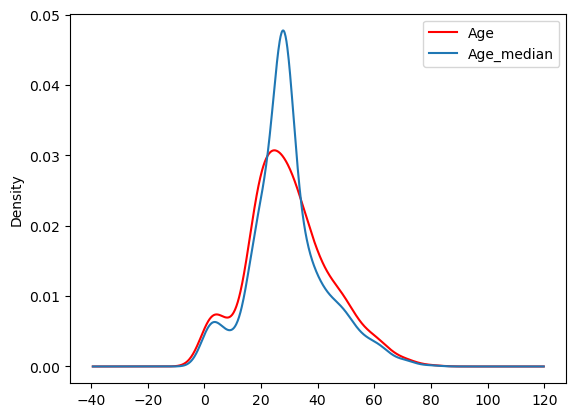

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color = 'red')
df.Age_median.plot(kind = 'kde', ax= ax)
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc ='best')

In [70]:
#advantages
#1. Easy to implement(robust to outliers)
#2. Faster way to obtain the complete dataset

# disadvantages
#1. Change or distrotion in original variance
#2. Impacts correlation

## 2. Random Sample Imputation

In [71]:
# Aim: consists of taking random observation from dataset and we use this to replace the nan values

# when to be used ? It assumes data are missing completely at random(MCAR)

import pandas as pd

df = pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\prep\datasets\titanic\train.csv", usecols = ['Age', 'Fare', 'Survived'])

In [72]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [73]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [74]:
#percentage
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [75]:
# sample picks some value from data
df['Age'].dropna().sample()

#here at 843 position one na is replaced by 34.5

843    34.5
Name: Age, dtype: float64

In [77]:
# to replace all na's with random value

df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state = 0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [90]:
def impute_random(df,variable, median):
    df[variable+'_median'] = df[variable].fillna(median)
    
    df[variable+'_random'] = df[variable]
    # random sample to fill na
    
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state = 0)
    #get indexes of nulls
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [124]:
median = df.Age.median()
median

28.0

In [125]:
impute_random(df,'Age', median)

In [126]:
df.head()

,Survived,Age,Fare,Age_end_distribution,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,35.0


In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

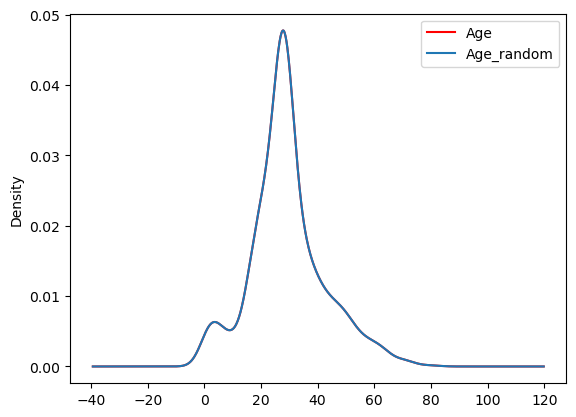

In [128]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color = 'red')
df.Age_random.plot(kind = 'kde', ax= ax)
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc ='best')

The data created is almost similar that's becos your data follows a normal distribution and less missing values, random imputation is more likely to yield representative values

#### Advantages 
1. Easy to implement
2. There is less distortion in variance 

#### Disadvantages
1. Every situation randomness doesn't work

## 3. Capturing NAN values with a new feature

It works well if data are not missing completely at random or MNAR

In [99]:
df = pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\prep\datasets\titanic\train.csv", usecols = ['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [100]:
df["Age_NAN"] = np.where(df['Age'].isnull(),1,0)

In [101]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [102]:
df.Age.mean()

29.69911764705882

In [103]:
df.Age.median()

28.0

In [104]:
df['Age'].fillna(df.Age.median(), inplace = True)

In [105]:
df

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,1
889,1,26.0,30.0000,0


#### Advantages
1. Easy to implement
2. captures importance of missing values

### Disadvantages
1. Creating additional features(may lead to curse of dimensionality)

## 4. End of distribution imputation

In [107]:
df = pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\prep\datasets\titanic\train.csv", usecols = ['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


<Axes: >

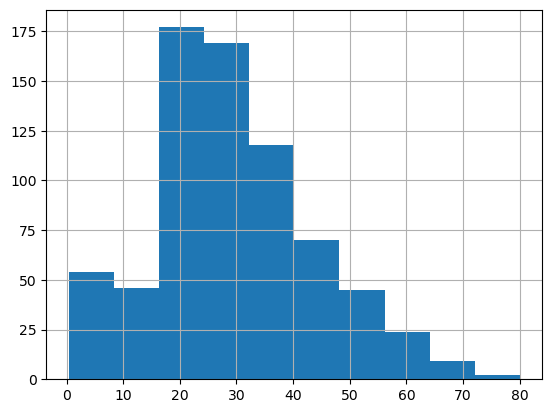

In [108]:
df.Age.hist()

In [114]:
# to take 3rd end distribution of Age right side becos we have outliers in right side only
extreme = df.Age.mean()+3*df.Age.std()

<Axes: >

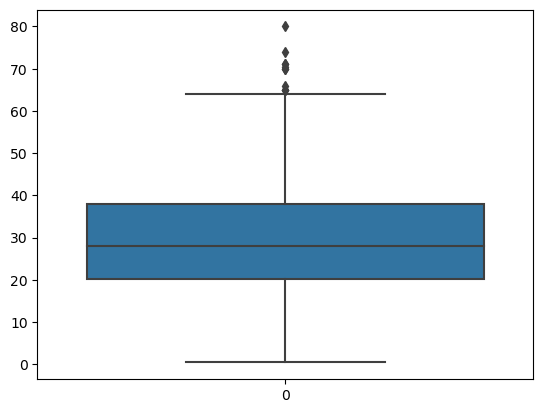

In [113]:
import seaborn as sns
sns.boxplot(df['Age'])

In [117]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace = True)

In [118]:
impute_nan(df,'Age',df['Age'].median(), extreme)

In [119]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<Axes: >

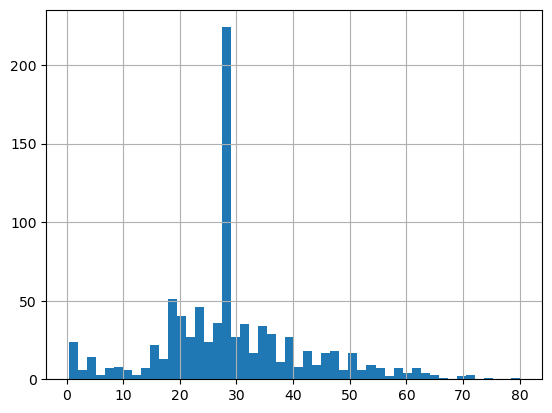

In [122]:
df['Age'].hist(bins=50)

<Axes: >

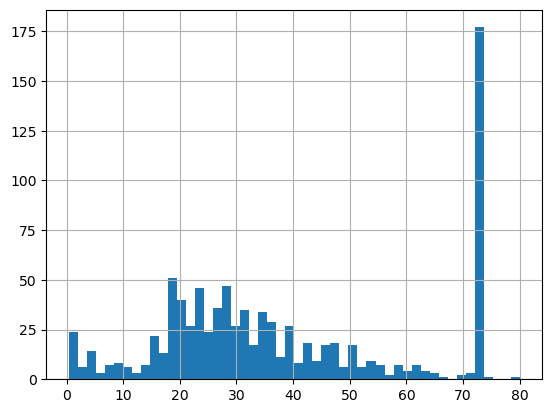

In [121]:
df['Age_end_distribution'].hist(bins= 50)

<Axes: >

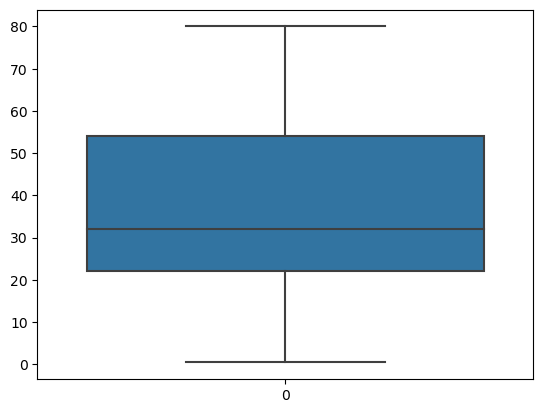

In [123]:
sns.boxplot(df['Age_end_distribution'])

No outlietrs

#### Advantages
1. Easy to implement
2. Captures the importance of missing vales

#### Disadvantages

1. Distorts the original distribution
2. If missingness is not important, it may mask the power of original variable by distorting its distribution
3. if num of na is big, it ll mask true outliers in ditribution
4. if num of na  is small, the replaced na may be considered an outlier and preprocessed in a subsequent....

## 5.Arbitrary Value Imputation

Was derived from kaggle competition
Consists of replacing NAN by an arbitrary value

In [129]:
import pandas as pd

In [130]:
df = pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\prep\datasets\titanic\train.csv", usecols = ['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [131]:
 def impute_nan(df, variable):
        df[variable+'_hundred'] = df[variable].fillna(100)
        df[variable+'_zero'] = df[variable].fillna(0)

<Axes: >

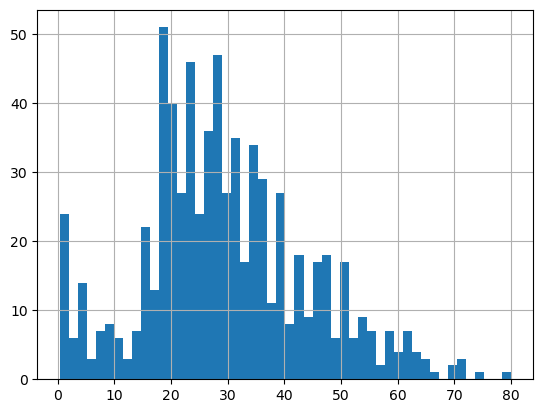

In [133]:
df.Age.hist(bins=50)

### Arbitrary values
### It should not be more frequently present

## Advantages
1. Easy to implement
2. Captures the importance of missingness if there is one

## Disadvantages
1. Distorts the original distribution of variable
2. If missingness is not imp, it may mask th epredictive power of original variable
3. Hard to decide which value to use

## How to handle categorical missing values

#### Frequent category Imputation - 
it is used where missing value are less

In [134]:
import pandas as pd

In [144]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [145]:
df = pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\prep\datasets\house-prices-advanced-regression-techniques\train.csv", usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [146]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [149]:
df.shape

(1460, 4)

In [147]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [148]:
df.isnull().mean().sort_values(ascending)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [150]:
## Compute the frequency with every feature
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<Axes: xlabel='BsmtQual'>

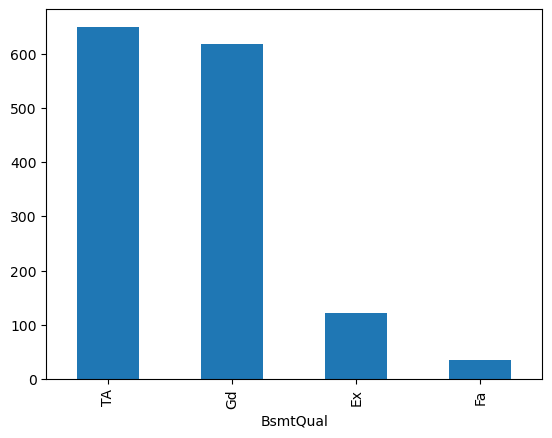

In [152]:
#plot
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending = False).plot.bar()

<Axes: >

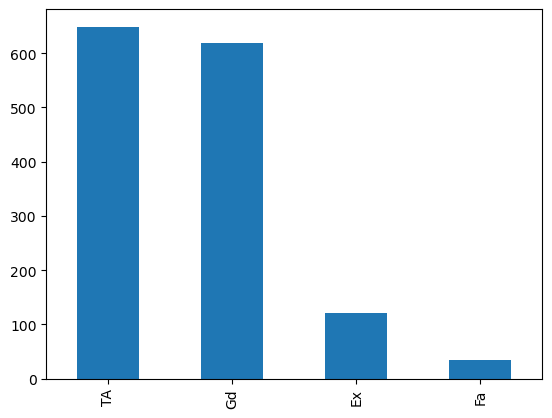

In [153]:
#or

df['BsmtQual'].value_counts().plot.bar()

<Axes: >

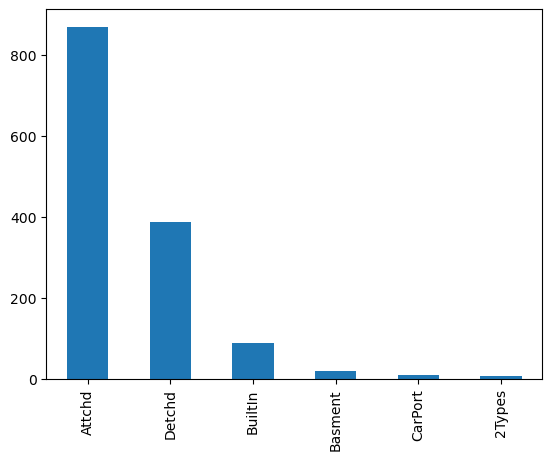

In [154]:
df['GarageType'].value_counts().plot.bar()

<Axes: >

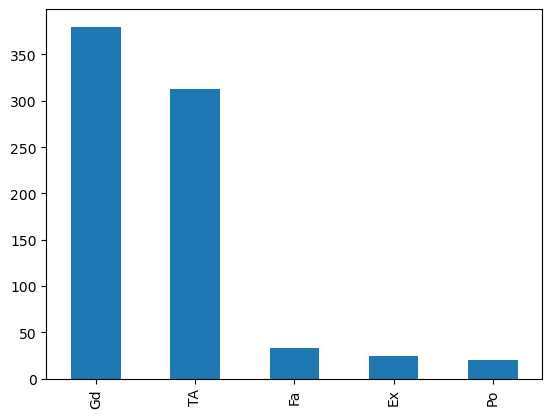

In [155]:
df['FireplaceQu'].value_counts().plot.bar()

In [157]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [159]:
#mode can also be used to find most frequent data
df['GarageType'].mode()[0]

'Attchd'

In [158]:
## replace function
def impute_nan(df,variable):
    most_frequent_category = df[variable].value_counts().index[0]#or
    most_frequent_category = df[variable].mode().index[0]
    df[variable].fillna(most_frequent_category, inplace = True)

In [160]:
for feature in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(df,feature)

In [161]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,Gd,Attchd,142125


#### Advantages
1. Easy to implement
2. faster to implement

#### Disadvantages
1. since we are using more frequent labels, it may use them in an over represented way if there are more missing values
2. It distorts the  relation of most frequent label

##### Replacing Nans with new values

In [166]:
#### Adding a variable to capture NAN

df = pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\prep\datasets\house-prices-advanced-regression-techniques\train.csv", usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [167]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [168]:
df['BsmtQual_var']= np.where(df['BsmtQual'].isnull(),1,0)

In [169]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [170]:
frequent = df['BsmtQual'].mode()[0]

In [171]:
df['BsmtQual'].fillna(frequent,inplace = True)

In [172]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0
1456,Gd,TA,Attchd,210000,0
1457,TA,Gd,Attchd,266500,0
1458,TA,NaN,Attchd,142125,0


In [173]:
df['FireplaceQu_var']= np.where(df['FireplaceQu'].isnull(),1,0)
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0],inplace = True)

In [174]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [175]:
### Suppose if u have more frequent categories, we just replace NAN with new category

df = pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\prep\datasets\house-prices-advanced-regression-techniques\train.csv", usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [176]:
df.head(5)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [179]:
def impute_nan(df,variable):
    df[variable] = np.where(df[variable].isnull(),'Missing',df[variable])

In [180]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [181]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,Missing,Attchd,142125


## Handle categorical Features

In [182]:
#### One hot Encoding

import pandas as pd

In [184]:
df = pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\prep\datasets\titanic\train.csv", usecols=['Sex'])

In [185]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [189]:
pd.get_dummies(df,drop_first=True).head() # drop_first is used becos here 1 column can represent both if its not male it can be considered as female

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [192]:
df = pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\prep\datasets\titanic\train.csv", usecols=['Embarked'])

In [193]:
df

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [197]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [198]:
df.dropna(inplace = True)

In [199]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [201]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


## Count or Frequency encoding  - Another example


In [203]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [204]:
columns=[1,3,5,6,7,8,9,13]

In [206]:
train_set = train_set[columns]

In [207]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [208]:
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [210]:
for feature in train_set.columns[:]:
    print(feature,":", len(train_set[feature].unique()),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [212]:
train_set['Country'].value_counts().to_dict()

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [213]:
country_map = train_set['Country'].value_counts().to_dict()

In [214]:
train_set['Country'] = train_set['Country'].map(country_map)

C:\Users\pavan\AppData\Local\Temp\ipykernel_1976\3809746398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Country'] = train_set['Country'].map(country_map)


In [215]:
train_set

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,29170
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,29170
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,29170
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,29170


## Target Guided ordinal encoding

1. Ordering the labels according to target
2. Replace the labels by joint probability of being 1 or 0

In [217]:
df = pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\prep\datasets\titanic\train.csv", usecols=['Cabin','Survived'])

In [218]:
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [220]:
df['Cabin'].fillna('Missing', inplace =True)

In [221]:
df

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing
...,...,...
886,0,Missing
887,1,B42
888,0,Missing
889,1,C148


In [224]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [225]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [230]:
ordinal_labels = df.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [231]:
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [232]:
ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [233]:
df['Cabin_ordinal_labels'] = df['Cabin'].map(ordinal_labels2)

In [234]:
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


## Mean Encoding

In [235]:
mean_ordinal = df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [236]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [237]:
df['mean_ordinal'] = df['Cabin'].map(mean_ordinal)

In [238]:
df

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854
...,...,...,...,...
886,0,M,1,0.299854
887,1,B,6,0.744681
888,0,M,1,0.299854
889,1,C,4,0.593220


#### Advantages
1. captures info within label therefore rendering more predictive features
2. creates monotonic relation between variable and target

#### Disadvantages
1.leads to overfitting

## Probability ratio encoding

Steps:
1. Probability of Survived based on Cabin--- Categorical Feature
2. Probability of Not Survived---1-pr(Survived)
3. pr(Survived)/pr(Not Survived)
4. Dictonary to map cabin with probability
5. replace with the categorical feature

In [240]:
df = pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\prep\datasets\titanic\train.csv", usecols=['Cabin','Survived'])

In [241]:
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [242]:
df['Cabin'].fillna('Missing', inplace = True)

In [243]:
df

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing
...,...,...
886,0,Missing
887,1,B42
888,0,Missing
889,1,C148


In [244]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [245]:
df['Cabin']= df['Cabin'].astype(str).str[0]

In [247]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [249]:
prob_df = df.groupby(['Cabin'])['Survived'].mean()

In [251]:
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [253]:
prob_df['Died'] = 1- prob_df['Survived']
prob_df

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
M,0.299854,0.700146
T,0.000000,1.000000


In [254]:
prob_df['Probability_ratio'] = prob_df['Survived']/prob_df['Died']

In [255]:
prob_df

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000
F,0.615385,0.384615,1.600000
G,0.500000,0.500000,1.000000
M,0.299854,0.700146,0.428274
T,0.000000,1.000000,0.000000


In [257]:
probability_encoded = prob_df['Probability_ratio'].to_dict()

In [258]:
df['Cabin_encoded'] = df['Cabin'].map(probability_encoded)

In [259]:
df

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
...,...,...,...
886,0,M,0.428274
887,1,B,2.916667
888,0,M,0.428274
889,1,C,1.458333
